C:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: numpy.arange
  from ipykernel import kernelapp as app


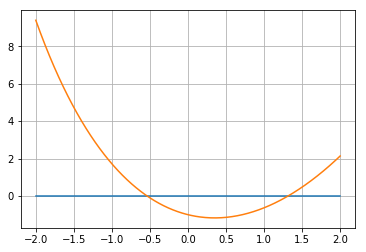

Iterations for bisection method: 18
Bisection method: -0.5372753143310547
Iterations for newtons method: 2
Newtons method -0.5372744491741096


In [2]:
#Вариант 1
#Задачи 2.2.1, 2.10.1
#Антонов Алексей

import math
from matplotlib import mlab
import matplotlib.pyplot as plt
from sympy import *
import pandas as pd

def plot():
    """
    Draw the graph of function
    """
    xmin = -2.0
    xmax = 2.0
    dx = 0.01
    # Создадим список координат по оси X на отрезке [-xmin; xmax], включая концы
    xlist = mlab.frange (xmin, xmax, dx)
    # Вычислим значение функции в заданных точках
    ylist = [func(x) for x in xlist]
    x1,y1 = [-2, 2], [0, 0]
    plt.grid()
    plt.plot(x1, y1)
    plt.plot (xlist, ylist)
    plt.show()

def bisection_method (begin, end, eps): 
    """
    Find a positive root by bisection method
    """
    half = half_range(begin, end)
    count = 0
    for i in range(1, 100):
        if((end - begin) / 2 > eps):
            count += 1
            half = half_range(begin, end)
            mean = begin + half
            if (func(begin) * func(mean) < 0):
                end = mean
            else:
                begin = mean
    print("Iterations for bisection method:", count)
    return mean

def newtons_method (begin, end, eps):
    """
    Find a positive root by Newton's method
    """
    x_next = lambda x: x - func(x) / derivative(x)
    count = 0
    x_0 = (begin + end) / 2
    x_n = x_next(x_0)
    for i in range(1, 100):
        if(abs(x_n - x_0) > eps):
            x_0 = x_n
            x_n = x_next(x_n)
            count += 1
    print("Iterations for newtons method:", count)
    return x_n

func = lambda x: math.exp(-x) - 2 + x ** 2 
derivative = lambda x: 2 * x - math.exp(-x) #deriviate of func
half_range = lambda begin, end: (end - begin) / 2

plot()

eps = 10 ** (-6)
begin = -0.75
end = -0.25

print("Bisection method:", bisection_method(begin, end, eps))
print("Newtons method", newtons_method(begin, end, eps))

x                    y              
1                    1.1999998688697815
1.5                  1.1999998688697815
2.0                  0.112319552898407
2.5                  0.13203471899032593
3.0                  0.15104361772537234
3.5                  0.1694005370140076
4.0                  0.18715268373489374
4.5                  0.20434280633926394
5.0                  0.2210081458091736


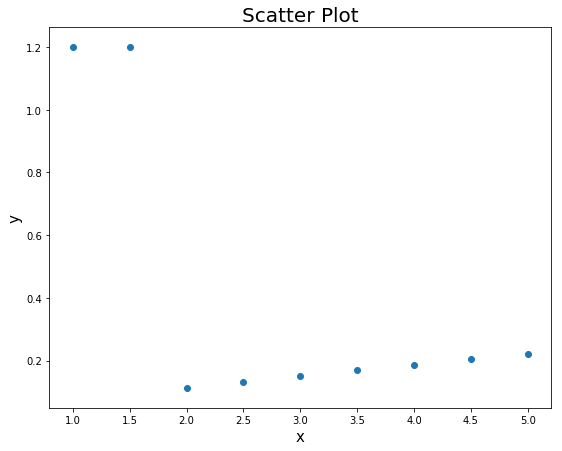

In [144]:
def bisection_method_x_y (begin, end, eps, x): 
    """
    Find a positive root by bisection method for two arguments function
    """
    half = half_range(begin, end)
    if(function(x, begin) == 0):
        return begin
    if(function(x, end) == 0):
        return end
    for i in range(1, 100):
        if((end - begin) / 2 > eps):
            half = half_range(begin, end)
            mean = begin + half
            if (function(x, begin) * function(x, mean) < 0):
                end = mean
            else:
                begin = mean
    return mean

function = lambda x, y: math.sinh( y * math.exp(y) - x / 20) + math.atan(20 * y * math.exp(y) - x) - 0.5

begin = 0.1
end = 1.2
eps = 10 ** (-7)

arr = {}
i = 1
while i <= 5:
    arr[i] = bisection_method_x_y(begin, end, eps, i)
    i += 0.5

# repackage data into array-like for matplotlib 
data = {"x":[], "y":[]}
for label, coord in arr.items():
    data["x"] = arr.keys()
    data["y"] = arr.values()

# display scatter plot data
plt.figure(figsize = (9, 7))
plt.title('Scatter Plot', fontsize = 20)
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.scatter(data["x"], data["y"], marker = 'o')

#print table
print("{:<20} {:<15}".format('x','y')) 
for value in arr.items():
    name, val = value
    print("{:<20} {:<15}".format(name, val))